### Name : Radwa Magdy Khairy Abo-zaid
### Student ID :  202100615

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from datasist.structdata import detect_outliers
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler , normalize , RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import scipy.cluster.hierarchy as sch
import scipy.cluster.hierarchy as sch
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering
import joblib
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("E-commerce_Data6.csv")

In [3]:
df

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_1,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning
0,6,2.55,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
1,6,3.39,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
2,8,2.75,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
3,2,7.65,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
4,6,4.25,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247188,6,2.08,2011,4,4,9,12,16,848.55,38,...,0,0,1,1,0,0.0,0.0,1.0,0.0,1.0
247189,10,1.65,2011,4,4,9,12,16,848.55,38,...,0,0,1,1,0,0.0,0.0,1.0,0.0,1.0
247190,9,4.95,2011,4,4,9,12,16,848.55,38,...,0,0,1,1,0,0.0,0.0,1.0,0.0,1.0
247191,12,0.85,2011,4,4,9,12,16,848.55,38,...,0,0,1,1,0,0.0,0.0,1.0,0.0,1.0


In [4]:
df_scaled = pd.DataFrame()

df_scaled[df.columns] = StandardScaler().fit_transform(df[df.columns])

df_scaled

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_1,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning
0,-0.039633,-0.036170,-3.701215,1.025584,-0.322999,-1.620197,-2.053034,-0.257431,-0.185240,-0.219475,...,-0.10394,-0.198217,-0.227508,-0.260628,0.301604,-0.499478,-0.505237,1.90944,-0.102579,1.026646
1,-0.039633,-0.006123,-3.701215,1.025584,-0.322999,-1.620197,-2.053034,-0.257431,-0.185240,-0.219475,...,-0.10394,-0.198217,-0.227508,-0.260628,0.301604,-0.499478,-0.505237,1.90944,-0.102579,1.026646
2,-0.030813,-0.029016,-3.701215,1.025584,-0.322999,-1.620197,-2.053034,-0.257431,-0.185240,-0.219475,...,-0.10394,-0.198217,-0.227508,-0.260628,0.301604,-0.499478,-0.505237,1.90944,-0.102579,1.026646
3,-0.057275,0.146256,-3.701215,1.025584,-0.322999,-1.620197,-2.053034,-0.257431,-0.185240,-0.219475,...,-0.10394,-0.198217,-0.227508,-0.260628,0.301604,-0.499478,-0.505237,1.90944,-0.102579,1.026646
4,-0.039633,0.024639,-3.701215,1.025584,-0.322999,-1.620197,-2.053034,-0.257431,-0.185240,-0.219475,...,-0.10394,-0.198217,-0.227508,-0.260628,0.301604,-0.499478,-0.505237,1.90944,-0.102579,1.026646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247188,-0.039633,-0.052981,0.270182,1.025584,0.722081,-0.694336,-0.302207,-0.842870,-0.329367,-0.414606,...,-0.10394,-0.198217,4.395454,3.836893,-3.315608,-0.499478,-0.505237,1.90944,-0.102579,1.026646
247189,-0.021992,-0.068362,0.270182,1.025584,0.722081,-0.694336,-0.302207,-0.842870,-0.329367,-0.414606,...,-0.10394,-0.198217,4.395454,3.836893,-3.315608,-0.499478,-0.505237,1.90944,-0.102579,1.026646
247190,-0.026403,0.049678,0.270182,1.025584,0.722081,-0.694336,-0.302207,-0.842870,-0.329367,-0.414606,...,-0.10394,-0.198217,4.395454,3.836893,-3.315608,-0.499478,-0.505237,1.90944,-0.102579,1.026646
247191,-0.013172,-0.096978,0.270182,1.025584,0.722081,-0.694336,-0.302207,-0.842870,-0.329367,-0.414606,...,-0.10394,-0.198217,4.395454,3.836893,-3.315608,-0.499478,-0.505237,1.90944,-0.102579,1.026646


In [5]:
df_new = df[:10000]

In [6]:
df_new_scaled = pd.DataFrame()

df_new_scaled[df_new.columns] = StandardScaler().fit_transform(df_new[df_new.columns])

df_new_scaled

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_1,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning
0,-0.248170,-0.015710,-2.227786,0.907698,-0.294255,-1.383089,-2.009473,-0.334042,-1.012376,-0.879782,...,0.0,0.0,-0.131113,-0.216567,0.191570,-0.459449,-0.471851,1.471924,-0.133072,0.906363
1,-0.248170,-0.005468,-2.227786,0.907698,-0.294255,-1.383089,-2.009473,-0.334042,-1.012376,-0.879782,...,0.0,0.0,-0.131113,-0.216567,0.191570,-0.459449,-0.471851,1.471924,-0.133072,0.906363
2,-0.219231,-0.013271,-2.227786,0.907698,-0.294255,-1.383089,-2.009473,-0.334042,-1.012376,-0.879782,...,0.0,0.0,-0.131113,-0.216567,0.191570,-0.459449,-0.471851,1.471924,-0.133072,0.906363
3,-0.306050,0.046472,-2.227786,0.907698,-0.294255,-1.383089,-2.009473,-0.334042,-1.012376,-0.879782,...,0.0,0.0,-0.131113,-0.216567,0.191570,-0.459449,-0.471851,1.471924,-0.133072,0.906363
4,-0.248170,0.005017,-2.227786,0.907698,-0.294255,-1.383089,-2.009473,-0.334042,-1.012376,-0.879782,...,0.0,0.0,-0.131113,-0.216567,0.191570,-0.459449,-0.471851,1.471924,-0.133072,0.906363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.248170,-0.021440,0.448876,0.907698,-0.294255,0.311084,1.979071,-0.395456,-1.069813,-0.917821,...,0.0,0.0,7.627031,4.617513,-5.220018,-0.459449,-0.471851,-0.679383,-0.133072,-1.103311
9996,-0.291580,0.013552,0.448876,0.907698,-0.294255,0.311084,1.979071,-0.395456,-1.069813,-0.917821,...,0.0,0.0,7.627031,4.617513,-5.220018,-0.459449,-0.471851,-0.679383,-0.133072,-1.103311
9997,-0.248170,-0.021196,0.448876,0.907698,-0.294255,0.311084,1.979071,-0.395456,-1.069813,-0.917821,...,0.0,0.0,7.627031,4.617513,-5.220018,-0.459449,-0.471851,-0.679383,-0.133072,-1.103311
9998,-0.248170,-0.010833,0.448876,0.907698,-0.294255,0.311084,1.979071,-0.395456,-1.069813,-0.917821,...,0.0,0.0,7.627031,4.617513,-5.220018,-0.459449,-0.471851,-0.679383,-0.133072,-1.103311


## Kmeans with Inertia:

In [7]:
inertia = list()
k_range = range(2 , 15)
for k in k_range:
    steps = list()
    steps.append(('Scaler' , StandardScaler()))
    steps.append(("Pca" , PCA(n_components=0.95)))
    steps.append(('Model' , KMeans(n_clusters = k)))
    pipeline = Pipeline(steps = steps)
    pipeline.fit(df[:10000])
    inertia.append(pipeline['Model'].inertia_)

In [8]:
inertia

[152122.14095818368,
 132502.17520918208,
 117273.53850507709,
 108107.63739504246,
 97168.18600397182,
 87318.81842757916,
 82205.8201732612,
 75083.21087991048,
 68763.5830793958,
 66105.4437636864,
 63144.92192584456,
 59748.50384578002,
 56822.264127108574]

<AxesSubplot:>

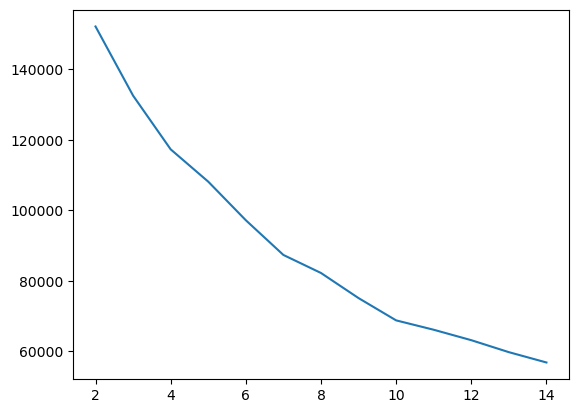

In [9]:
sns.lineplot(x = k_range , y = inertia)

In [10]:
k1 = KneeLocator(k_range , inertia , curve = "convex" , direction = "decreasing")

In [11]:
k1.elbow

7

In [12]:
steps = list()
steps.append(('Scaler' , StandardScaler()))
steps.append(("Pca" , PCA(n_components=0.95)))
steps.append(('Model' , KMeans(n_clusters=7)))
pipeline = Pipeline(steps = steps)
pipeline.fit(df_new)
df_new['Clusters'] = pipeline.predict(df_new)

In [13]:
df_new['Clusters'].unique()

array([1, 5, 2, 4, 3, 0, 6])

In [14]:
df_new

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning,Clusters
0,6,2.55,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,1
1,6,3.39,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,1
2,8,2.75,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,1
3,2,7.65,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,1
4,6,4.25,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,2.08,2011,4,2,16,17,25,3849.78,230,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0
9996,3,4.95,2011,4,2,16,17,25,3849.78,230,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0
9997,6,2.10,2011,4,2,16,17,25,3849.78,230,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0
9998,6,2.95,2011,4,2,16,17,25,3849.78,230,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
cluster = pipeline["Model"].cluster_centers_

In [16]:
cluster

array([[ 3.32296929e+00,  6.49905050e+00, -1.99501012e+00,
         7.01972054e-02,  6.52306477e-01, -2.38102866e-01,
         8.33518921e-01,  6.53182626e-02, -1.35478873e-01,
        -5.38712872e-02, -2.22549577e-01,  9.91284146e-02,
        -3.44477629e-01, -7.62411930e-02],
       [ 2.14258604e+00, -1.77556954e+00, -1.04236060e+00,
         4.45929011e-01,  9.61184815e-02,  6.10888713e-03,
        -1.03177420e-01,  6.39528781e-03, -2.54225769e-04,
        -9.65960043e-02,  1.50627383e-01,  6.85822617e-02,
        -1.26096732e-01,  7.21694590e-01],
       [-1.01717781e+00,  7.38971928e-01,  1.33943676e+00,
         1.63373383e+00, -7.44323905e-01, -1.00162235e-01,
         1.83623694e-01, -3.99888348e-02,  2.29900829e-02,
        -4.90284113e-02,  1.72138134e-01, -4.74855453e-01,
        -1.42078697e-01,  5.01097221e-01],
       [ 5.46530127e-01, -3.27397443e-01,  8.68958610e-01,
        -4.34161542e-01, -1.03065032e-02, -1.18744599e-01,
         4.69503900e-01, -3.41378744e-02,  1.

In [17]:
x_cluster = cluster[:,0]

In [18]:
x_cluster

array([ 3.32296929,  2.14258604, -1.01717781,  0.54653013, -0.82958711,
       -1.04909453, -3.83345055])

In [19]:
y_cluster = cluster[:,1]

In [20]:
y_cluster

array([ 6.4990505 , -1.77556954,  0.73897193, -0.32739744,  0.4336231 ,
       -0.25692242,  0.07933633])

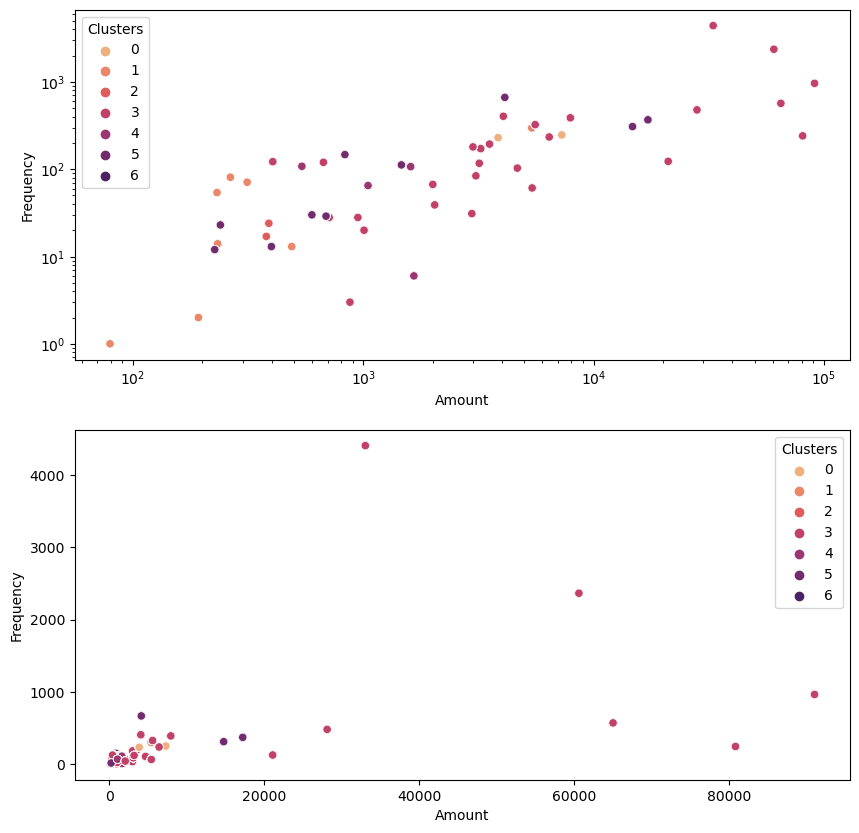

In [21]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

sns.scatterplot(data = df_new ,ax=ax[1] ,  y = 'Frequency', x = 'Amount' , hue ="Clusters" ,palette="flare")
#ax[1].set_yscale()
#ax[1].set_xscale()

sns.scatterplot(data = df_new ,ax=ax[0] ,  y = 'Frequency', x = 'Amount' , hue ="Clusters" ,palette="flare")
ax[0].set_yscale("log")
ax[0].set_xscale("log")


In [22]:
for i in range(0,7):
    print('Percentage of cluster',i, 'is', ((df_new[df_new['Clusters'] == i].shape[0] / df_new.shape[0]) * 100))

Percentage of cluster 0 is 3.54
Percentage of cluster 1 is 16.21
Percentage of cluster 2 is 15.909999999999998
Percentage of cluster 3 is 24.02
Percentage of cluster 4 is 16.88
Percentage of cluster 5 is 21.7
Percentage of cluster 6 is 1.7399999999999998


## Kmeans with Silhouette:

In [23]:
df_new1 = df[:10000]
df_new1

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_1,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning
0,6,2.55,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
1,6,3.39,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
2,8,2.75,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
3,2,7.65,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
4,6,4.25,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,2.08,2011,4,2,16,17,25,3849.78,230,...,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0
9996,3,4.95,2011,4,2,16,17,25,3849.78,230,...,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0
9997,6,2.10,2011,4,2,16,17,25,3849.78,230,...,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0
9998,6,2.95,2011,4,2,16,17,25,3849.78,230,...,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_new1_scaled = pd.DataFrame()

df_new1_scaled[df_new1.columns] = StandardScaler().fit_transform(df_new1[df_new1.columns])

df_new1_scaled

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_1,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning
0,-0.248170,-0.015710,-2.227786,0.907698,-0.294255,-1.383089,-2.009473,-0.334042,-1.012376,-0.879782,...,0.0,0.0,-0.131113,-0.216567,0.191570,-0.459449,-0.471851,1.471924,-0.133072,0.906363
1,-0.248170,-0.005468,-2.227786,0.907698,-0.294255,-1.383089,-2.009473,-0.334042,-1.012376,-0.879782,...,0.0,0.0,-0.131113,-0.216567,0.191570,-0.459449,-0.471851,1.471924,-0.133072,0.906363
2,-0.219231,-0.013271,-2.227786,0.907698,-0.294255,-1.383089,-2.009473,-0.334042,-1.012376,-0.879782,...,0.0,0.0,-0.131113,-0.216567,0.191570,-0.459449,-0.471851,1.471924,-0.133072,0.906363
3,-0.306050,0.046472,-2.227786,0.907698,-0.294255,-1.383089,-2.009473,-0.334042,-1.012376,-0.879782,...,0.0,0.0,-0.131113,-0.216567,0.191570,-0.459449,-0.471851,1.471924,-0.133072,0.906363
4,-0.248170,0.005017,-2.227786,0.907698,-0.294255,-1.383089,-2.009473,-0.334042,-1.012376,-0.879782,...,0.0,0.0,-0.131113,-0.216567,0.191570,-0.459449,-0.471851,1.471924,-0.133072,0.906363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.248170,-0.021440,0.448876,0.907698,-0.294255,0.311084,1.979071,-0.395456,-1.069813,-0.917821,...,0.0,0.0,7.627031,4.617513,-5.220018,-0.459449,-0.471851,-0.679383,-0.133072,-1.103311
9996,-0.291580,0.013552,0.448876,0.907698,-0.294255,0.311084,1.979071,-0.395456,-1.069813,-0.917821,...,0.0,0.0,7.627031,4.617513,-5.220018,-0.459449,-0.471851,-0.679383,-0.133072,-1.103311
9997,-0.248170,-0.021196,0.448876,0.907698,-0.294255,0.311084,1.979071,-0.395456,-1.069813,-0.917821,...,0.0,0.0,7.627031,4.617513,-5.220018,-0.459449,-0.471851,-0.679383,-0.133072,-1.103311
9998,-0.248170,-0.010833,0.448876,0.907698,-0.294255,0.311084,1.979071,-0.395456,-1.069813,-0.917821,...,0.0,0.0,7.627031,4.617513,-5.220018,-0.459449,-0.471851,-0.679383,-0.133072,-1.103311


In [25]:
silhoute = list()
k_range = range(2,15)
for k in k_range:
    steps = list()
    steps.append(('Scaler' , StandardScaler()))
    steps.append(("Pca" , PCA(n_components=0.95)))
    steps.append(('Model' , KMeans(n_clusters = k)))
    pipeline = Pipeline(steps = steps)
    pipeline.fit(df_new1)
    silhoute.append(silhouette_score( df_new1_scaled ,  pipeline["Model"].labels_ ))

In [26]:
silhoute

[0.48974213707490744,
 0.14666927319252218,
 0.17412047894096808,
 0.1918989986083614,
 0.1924287859672635,
 0.21423927944996654,
 0.19485740103177399,
 0.2241441341315349,
 0.23467830082907876,
 0.2358913657461213,
 0.21951458802922508,
 0.23044168919438754,
 0.22684738708637306]

<AxesSubplot:>

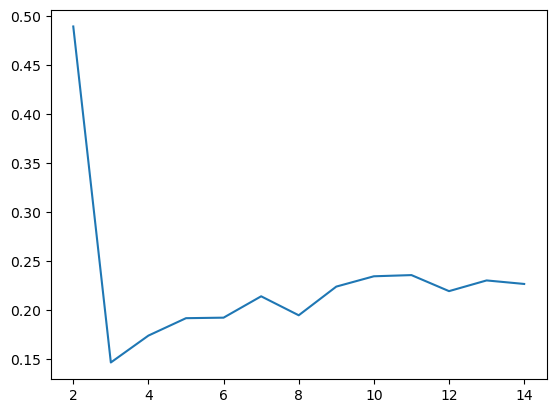

In [27]:
sns.lineplot(x = k_range , y = silhoute)

In [28]:
df_new1

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_1,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning
0,6,2.55,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
1,6,3.39,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
2,8,2.75,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
3,2,7.65,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
4,6,4.25,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,2.08,2011,4,2,16,17,25,3849.78,230,...,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0
9996,3,4.95,2011,4,2,16,17,25,3849.78,230,...,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0
9997,6,2.10,2011,4,2,16,17,25,3849.78,230,...,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0
9998,6,2.95,2011,4,2,16,17,25,3849.78,230,...,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0


In [29]:
steps = list()
steps.append(('Scaler' , StandardScaler()))
steps.append(("Pca" , PCA(n_components=0.95)))
steps.append(('Model' , KMeans(n_clusters=2)))
pipeline = Pipeline(steps = steps)
pipeline.fit(df_new1)
df_new1['Clusters'] = pipeline.predict(df_new1)

In [30]:
df_new1

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning,Clusters
0,6,2.55,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,1
1,6,3.39,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,1
2,8,2.75,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,1
3,2,7.65,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,1
4,6,4.25,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,2.08,2011,4,2,16,17,25,3849.78,230,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0
9996,3,4.95,2011,4,2,16,17,25,3849.78,230,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0
9997,6,2.10,2011,4,2,16,17,25,3849.78,230,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0
9998,6,2.95,2011,4,2,16,17,25,3849.78,230,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0


In [31]:
cluster = pipeline["Model"].cluster_centers_

In [32]:
x_cluster = cluster[:,0]

In [33]:
x_cluster

array([ 3.32296929, -0.12195015])

In [34]:
y_cluster = cluster[:,1]

In [35]:
y_cluster

array([ 6.4990505 , -0.23850963])

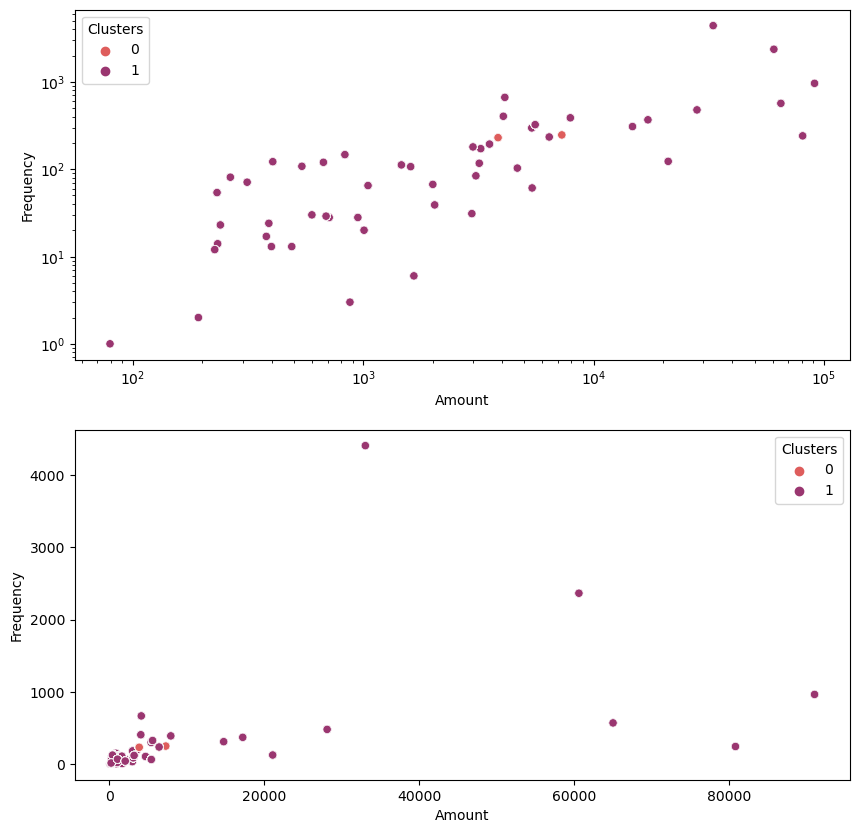

In [36]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

sns.scatterplot(data = df_new1 ,ax=ax[1] ,  y = 'Frequency', x = 'Amount' , hue ="Clusters" ,palette="flare")


sns.scatterplot(data = df_new1 ,ax=ax[0] ,  y = 'Frequency', x = 'Amount' , hue ="Clusters" ,palette="flare")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

In [37]:
for i in range(0,2):
    print('Percentage of cluster',i, 'is', ((df_new1[df_new1['Clusters'] == i].shape[0] / df_new1.shape[0]) * 100))

Percentage of cluster 0 is 3.54
Percentage of cluster 1 is 96.46000000000001


## Hierarchical Clustering:

In [38]:
df_scaled

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_1,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning
0,-0.039633,-0.036170,-3.701215,1.025584,-0.322999,-1.620197,-2.053034,-0.257431,-0.185240,-0.219475,...,-0.10394,-0.198217,-0.227508,-0.260628,0.301604,-0.499478,-0.505237,1.90944,-0.102579,1.026646
1,-0.039633,-0.006123,-3.701215,1.025584,-0.322999,-1.620197,-2.053034,-0.257431,-0.185240,-0.219475,...,-0.10394,-0.198217,-0.227508,-0.260628,0.301604,-0.499478,-0.505237,1.90944,-0.102579,1.026646
2,-0.030813,-0.029016,-3.701215,1.025584,-0.322999,-1.620197,-2.053034,-0.257431,-0.185240,-0.219475,...,-0.10394,-0.198217,-0.227508,-0.260628,0.301604,-0.499478,-0.505237,1.90944,-0.102579,1.026646
3,-0.057275,0.146256,-3.701215,1.025584,-0.322999,-1.620197,-2.053034,-0.257431,-0.185240,-0.219475,...,-0.10394,-0.198217,-0.227508,-0.260628,0.301604,-0.499478,-0.505237,1.90944,-0.102579,1.026646
4,-0.039633,0.024639,-3.701215,1.025584,-0.322999,-1.620197,-2.053034,-0.257431,-0.185240,-0.219475,...,-0.10394,-0.198217,-0.227508,-0.260628,0.301604,-0.499478,-0.505237,1.90944,-0.102579,1.026646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247188,-0.039633,-0.052981,0.270182,1.025584,0.722081,-0.694336,-0.302207,-0.842870,-0.329367,-0.414606,...,-0.10394,-0.198217,4.395454,3.836893,-3.315608,-0.499478,-0.505237,1.90944,-0.102579,1.026646
247189,-0.021992,-0.068362,0.270182,1.025584,0.722081,-0.694336,-0.302207,-0.842870,-0.329367,-0.414606,...,-0.10394,-0.198217,4.395454,3.836893,-3.315608,-0.499478,-0.505237,1.90944,-0.102579,1.026646
247190,-0.026403,0.049678,0.270182,1.025584,0.722081,-0.694336,-0.302207,-0.842870,-0.329367,-0.414606,...,-0.10394,-0.198217,4.395454,3.836893,-3.315608,-0.499478,-0.505237,1.90944,-0.102579,1.026646
247191,-0.013172,-0.096978,0.270182,1.025584,0.722081,-0.694336,-0.302207,-0.842870,-0.329367,-0.414606,...,-0.10394,-0.198217,4.395454,3.836893,-3.315608,-0.499478,-0.505237,1.90944,-0.102579,1.026646


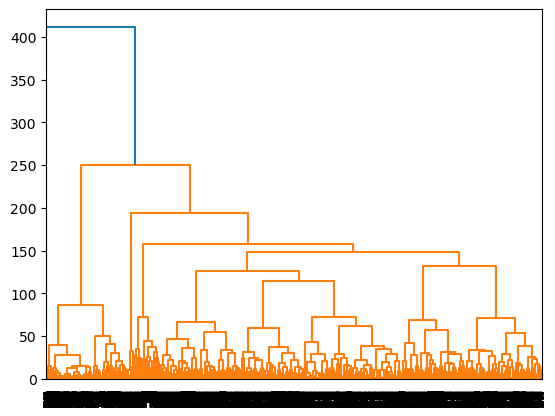

In [39]:
dend = sch.dendrogram(sch.linkage(df_scaled[:10000] , method="ward"))

In [40]:
silhoute = list()
cluster_range = range(2,10)
for c in cluster_range:
    steps = list()
    steps.append(("Scaler" , StandardScaler()))
    steps.append(("Pca" , PCA(n_components=0.95)))
    steps.append(("Model" , AgglomerativeClustering(n_clusters=c , linkage="ward")))
    pipeline = Pipeline(steps = steps)
    pipeline.fit(df[:10000])
    silhoute.append(silhouette_score(df_scaled[:10000] ,pipeline["Model"].labels_ ))

<AxesSubplot:>

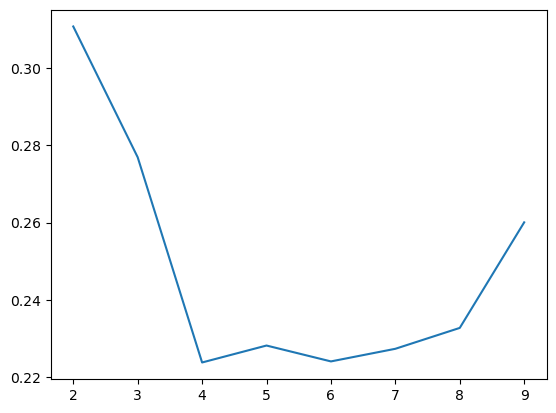

In [41]:
sns.lineplot(x = cluster_range , y = silhoute)

In [42]:
steps = list()
steps.append(("Scaler" , StandardScaler()))
steps.append(("Pca" , PCA(n_components=0.95)))
steps.append(("Model" , AgglomerativeClustering(n_clusters=2 , linkage="ward")))
pipeline = Pipeline(steps = steps)
pipeline.fit(df[:10000])

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('Model',
                 AgglomerativeClustering(affinity='euclidean',
                                         compute_full_tree='auto',
                                         connectivity=None,
                                         distance_threshold=None,
                                         linkage='ward', memory=None,
                                         n_clusters=2))],
         verbose=False)

In [43]:
df_new2 = df[:10000]

In [44]:
df_new2['Clusters'] = pipeline.fit_predict(df_new2)

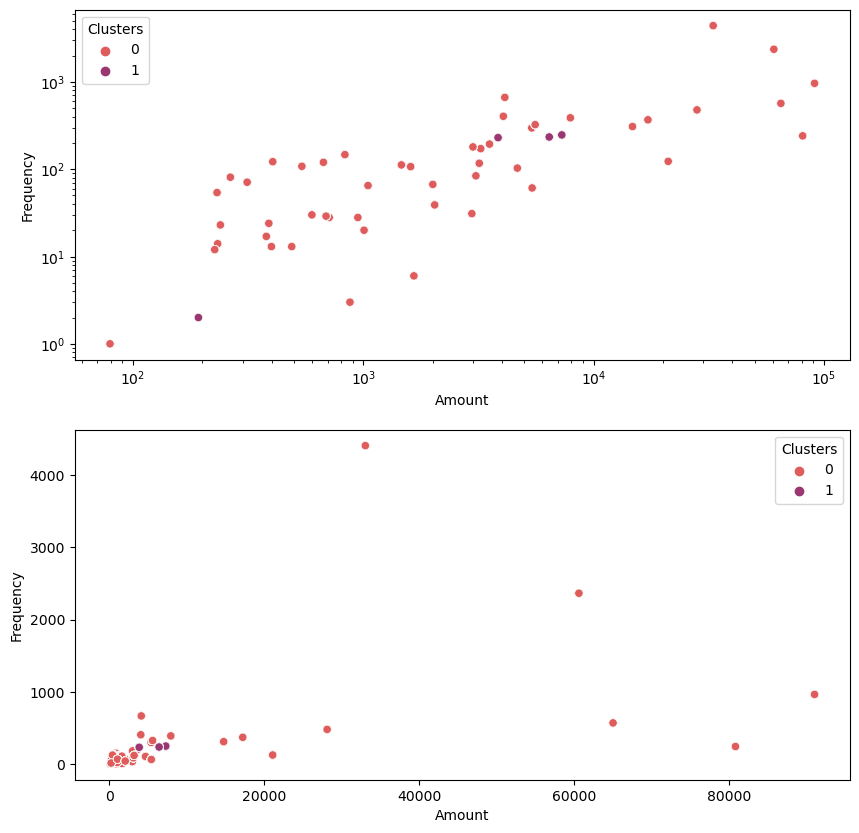

In [45]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

sns.scatterplot(data = df_new2 ,ax=ax[1] ,  x='Amount', y='Frequency', hue = 'Clusters' ,palette="flare")

sns.scatterplot(data = df_new2 ,ax=ax[0] ,  x='Amount', y='Frequency', hue = 'Clusters' ,palette="flare")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

In [46]:
for i in range(0,2):
    print('Percentage of cluster',i, 'is', ((df_new2[df_new2['Clusters'] == i].shape[0] / df_new2.shape[0]) * 100))

Percentage of cluster 0 is 95.15
Percentage of cluster 1 is 4.8500000000000005


## DBSCAN:

In [47]:
df_new3 = df[:1000]
df_new3

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_1,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning
0,6,2.55,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
1,6,3.39,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
2,8,2.75,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
3,2,7.65,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
4,6,4.25,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,3.95,2010,4,1,14,13,58,60632.75,2366,...,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
996,1,8.50,2010,4,1,14,13,58,60632.75,2366,...,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
997,1,1.45,2010,4,1,14,13,58,60632.75,2366,...,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
998,1,1.65,2010,4,1,14,13,58,60632.75,2366,...,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0


In [48]:
from sklearn.cluster import DBSCAN
steps = list()
steps.append(("Scaler" , StandardScaler()))
steps.append(("Pca" , PCA(n_components=0.95)))
steps.append(("Model" , DBSCAN(eps=5, min_samples=4, metric='euclidean')))
pipeline = Pipeline(steps = steps)
df_new3['Clusters'] = pipeline.fit_predict(df_new3)

In [49]:
df_new3['Clusters'].value_counts()

 0    996
-1      4
Name: Clusters, dtype: int64

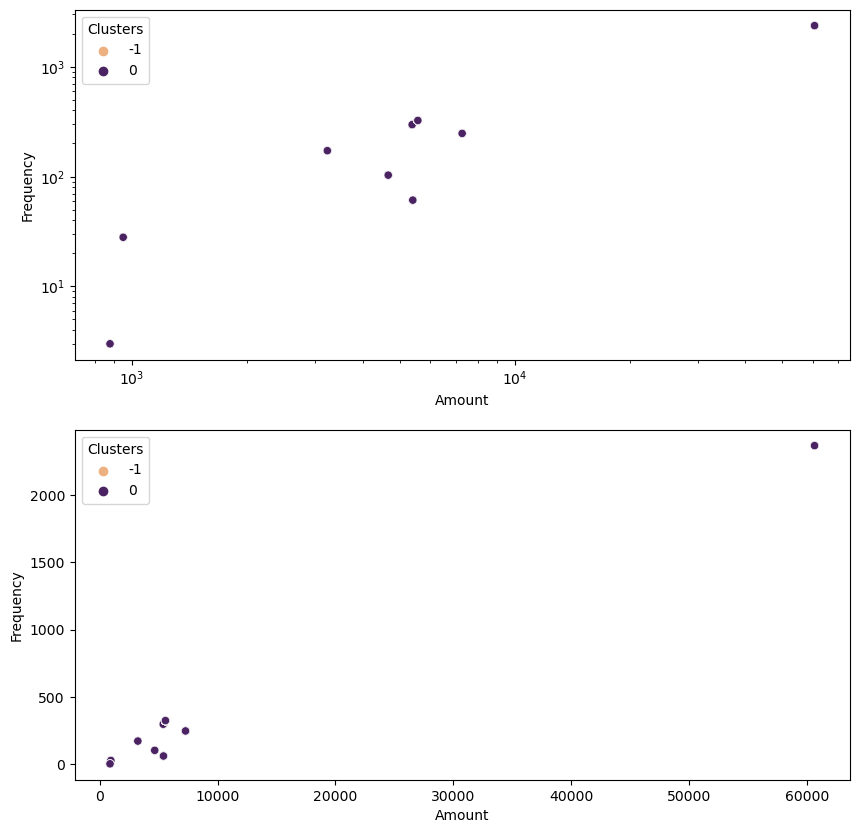

In [50]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

sns.scatterplot(data = df_new3 ,ax=ax[1] ,  x='Amount', y='Frequency', hue = 'Clusters' ,palette="flare")

sns.scatterplot(data = df_new3 ,ax=ax[0] ,  x='Amount', y='Frequency', hue = 'Clusters' ,palette="flare")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

In [51]:
for i in range(0,2):
    print('Percentage of cluster',i, 'is', ((df_new3[df_new3['Clusters'] == i].shape[0] / df_new3.shape[0]) * 100))

Percentage of cluster 0 is 99.6
Percentage of cluster 1 is 0.0


## Gaussian Mixture Model:

In [52]:
df

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_1,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning
0,6,2.55,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
1,6,3.39,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
2,8,2.75,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
3,2,7.65,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
4,6,4.25,2010,4,2,1,8,26,5391.21,297,...,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247188,6,2.08,2011,4,4,9,12,16,848.55,38,...,0,0,1,1,0,0.0,0.0,1.0,0.0,1.0
247189,10,1.65,2011,4,4,9,12,16,848.55,38,...,0,0,1,1,0,0.0,0.0,1.0,0.0,1.0
247190,9,4.95,2011,4,4,9,12,16,848.55,38,...,0,0,1,1,0,0.0,0.0,1.0,0.0,1.0
247191,12,0.85,2011,4,4,9,12,16,848.55,38,...,0,0,1,1,0,0.0,0.0,1.0,0.0,1.0


In [53]:
from sklearn.mixture import GaussianMixture
steps = list()
steps.append(("Scaler" , StandardScaler()))
steps.append(("Pca" , PCA(n_components=0.95)))
steps.append(("Model" , GaussianMixture(n_components=8)))
pipeline = Pipeline(steps = steps)
df['Clusters'] = pipeline.fit_predict(df)

In [54]:
df['Clusters'].value_counts()

1    82821
0    36475
4    33373
6    22501
2    21733
5    20988
3    20818
7     8484
Name: Clusters, dtype: int64

In [55]:
df

,Quantity,UnitPrice,Year,Quarter,Weekday,Day,Hour,Minute,Amount,Frequency,...,Country_2,Country_3,Country_4,Country_5,x1_Spring,x1_Summer,x1_Winter,x2_evening,x2_morning,Clusters
0,6,2.55,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0
1,6,3.39,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0
2,8,2.75,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0
3,2,7.65,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0
4,6,4.25,2010,4,2,1,8,26,5391.21,297,...,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247188,6,2.08,2011,4,4,9,12,16,848.55,38,...,0,1,1,0,0.0,0.0,1.0,0.0,1.0,3
247189,10,1.65,2011,4,4,9,12,16,848.55,38,...,0,1,1,0,0.0,0.0,1.0,0.0,1.0,3
247190,9,4.95,2011,4,4,9,12,16,848.55,38,...,0,1,1,0,0.0,0.0,1.0,0.0,1.0,3
247191,12,0.85,2011,4,4,9,12,16,848.55,38,...,0,1,1,0,0.0,0.0,1.0,0.0,1.0,3


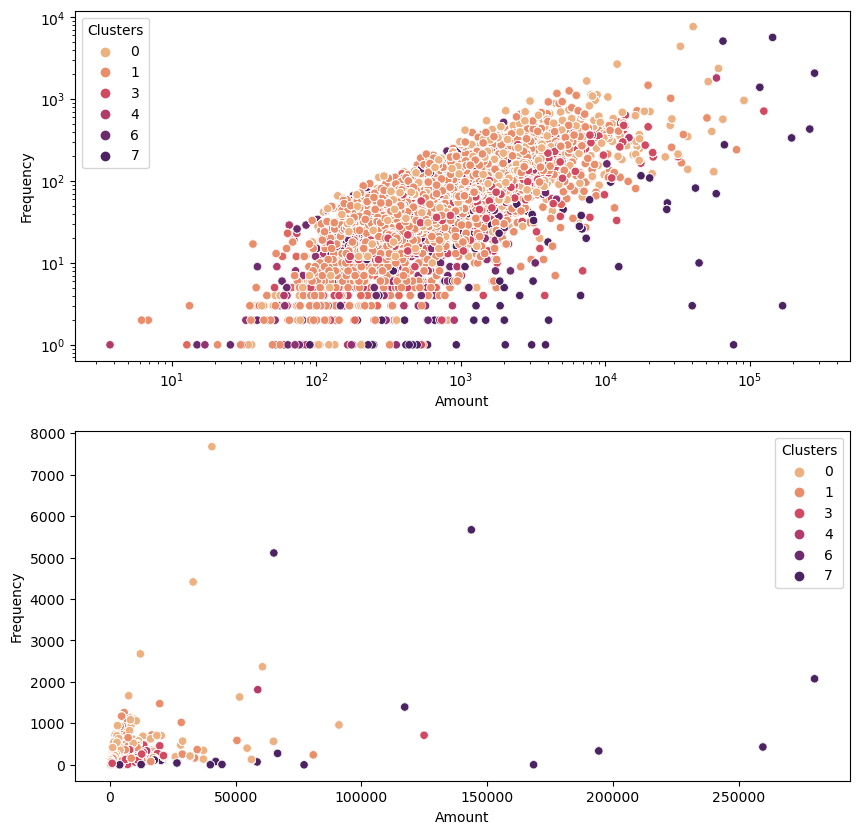

In [56]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

sns.scatterplot(data = df ,ax=ax[1] , x='Amount', y='Frequency', hue = 'Clusters',palette="flare")

sns.scatterplot(data = df ,ax=ax[0] , x='Amount', y='Frequency', hue = 'Clusters' ,palette="flare")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

In [57]:
for i in range(0,8):
    print('Percentage of cluster',i, 'is', ((df[df['Clusters'] == i].shape[0] / df.shape[0]) * 100))

Percentage of cluster 0 is 14.755676738418968
Percentage of cluster 1 is 33.504589531256954
Percentage of cluster 2 is 8.791915628678804
Percentage of cluster 3 is 8.421759515843895
Percentage of cluster 4 is 13.500786834578648
Percentage of cluster 5 is 8.490531689813222
Percentage of cluster 6 is 9.102604038140239
Percentage of cluster 7 is 3.4321360232692673
